# scikit-learn: การแปลงกลุ่มของ dummy/one-hot คอลัมน์ให้เป็น multivalued column ด้วย MultiLabelBinarizer
* doc: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
* github: https://github.com/prasertcbs/scikitlearn_tutorial
---

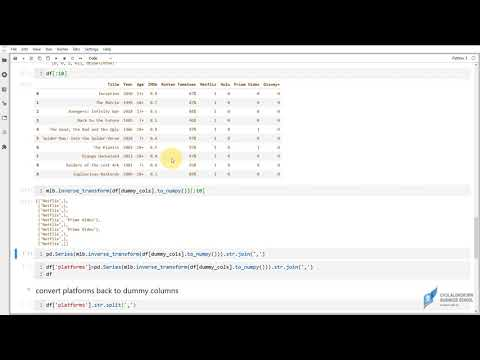

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('FfxV0GNO9l4', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy  version: {np.__version__}')

pandas version: 1.1.3
numpy  version: 1.19.2


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-03 15:10:54.165363')

In [5]:
# source: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney
url='https://github.com/prasertcbs/basic-dataset/raw/master/MoviesOnStreamingPlatforms_updated.csv'
df=pd.read_csv(url, nrows=100)
df[:5]

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161


In [6]:
df=df.loc[:, 'Title':'Disney+']
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Inception,2010,13+,8.8,87%,1,0,0,0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0
...,...,...,...,...,...,...,...,...,...
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1
96,Icarus,2017,18+,7.9,93%,1,0,0,0
97,Jiro Dreams of Sushi,2011,7+,7.9,99%,1,1,0,0
98,Corpse Bride,2005,7+,7.3,84%,1,0,0,0


## scikit-learn: MultiLabelBinarizer

In [7]:
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer

In [8]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.23.2


In [9]:
df[:5]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Inception,2010,13+,8.8,87%,1,0,0,0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0


In [10]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+'],
      dtype='object')

In [11]:
dummy_cols=sorted(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
dummy_cols

['Disney+', 'Hulu', 'Netflix', 'Prime Video']

In [12]:
mlb = MultiLabelBinarizer()
mlb.fit([dummy_cols])

MultiLabelBinarizer()

In [13]:
mlb.classes_

array(['Disney+', 'Hulu', 'Netflix', 'Prime Video'], dtype=object)

In [14]:
g = np.array([
    [1, 0, 1, 1],
    [1, 1, 1, 1]
])
mlb.inverse_transform(g)

[('Disney+', 'Netflix', 'Prime Video'),
 ('Disney+', 'Hulu', 'Netflix', 'Prime Video')]

In [15]:
df[:5]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Inception,2010,13+,8.8,87%,1,0,0,0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0


In [16]:
df[dummy_cols].to_numpy()[:10]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=int64)

In [17]:
df[:10]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Inception,2010,13+,8.8,87%,1,0,0,0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0
5,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0


In [18]:
mlb.inverse_transform(df[dummy_cols].to_numpy())[:10]

[('Netflix',),
 ('Netflix',),
 ('Netflix',),
 ('Netflix',),
 ('Netflix', 'Prime Video'),
 ('Netflix',),
 ('Netflix', 'Prime Video'),
 ('Netflix',),
 ('Netflix',),
 ('Netflix',)]

In [19]:
pd.Series(mlb.inverse_transform(df[dummy_cols].to_numpy())).str.join(',')

0                 Netflix
1                 Netflix
2                 Netflix
3                 Netflix
4     Netflix,Prime Video
             ...         
95        Disney+,Netflix
96                Netflix
97           Hulu,Netflix
98                Netflix
99                Netflix
Length: 100, dtype: object

In [20]:
df['platforms']=pd.Series(mlb.inverse_transform(df[dummy_cols].to_numpy())).str.join(',')
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,platforms
0,Inception,2010,13+,8.8,87%,1,0,0,0,Netflix
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,Netflix
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,Netflix
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Netflix
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,"Netflix,Prime Video"
...,...,...,...,...,...,...,...,...,...,...
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,"Disney+,Netflix"
96,Icarus,2017,18+,7.9,93%,1,0,0,0,Netflix
97,Jiro Dreams of Sushi,2011,7+,7.9,99%,1,1,0,0,"Hulu,Netflix"
98,Corpse Bride,2005,7+,7.3,84%,1,0,0,0,Netflix


## convert platforms back to dummy columns

In [21]:
df.drop(columns=dummy_cols, inplace=True)

In [22]:
df

,Title,Year,Age,IMDb,Rotten Tomatoes,platforms
0,Inception,2010,13+,8.8,87%,Netflix
1,The Matrix,1999,18+,8.7,87%,Netflix
2,Avengers: Infinity War,2018,13+,8.5,84%,Netflix
3,Back to the Future,1985,7+,8.5,96%,Netflix
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,"Netflix,Prime Video"
...,...,...,...,...,...,...
95,Saving Mr. Banks,2013,13+,7.5,79%,"Disney+,Netflix"
96,Icarus,2017,18+,7.9,93%,Netflix
97,Jiro Dreams of Sushi,2011,7+,7.9,99%,"Hulu,Netflix"
98,Corpse Bride,2005,7+,7.3,84%,Netflix


In [23]:
df['platforms'].str.split(',')

0                  [Netflix]
1                  [Netflix]
2                  [Netflix]
3                  [Netflix]
4     [Netflix, Prime Video]
               ...          
95        [Disney+, Netflix]
96                 [Netflix]
97           [Hulu, Netflix]
98                 [Netflix]
99                 [Netflix]
Name: platforms, Length: 100, dtype: object

In [24]:
mlb.fit_transform(df['platforms'].str.split(','))[:5]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 1]])

In [25]:
mlb.classes_

array(['Disney+', 'Hulu', 'Netflix', 'Prime Video'], dtype=object)

In [26]:
dg=pd.DataFrame(mlb.fit_transform(df['platforms'].str.split(',')), columns=mlb.classes_)
dg

,Disney+,Hulu,Netflix,Prime Video
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,1
...,...,...,...,...
95,1,0,1,0
96,0,0,1,0
97,0,1,1,0
98,0,0,1,0


In [27]:
pd.concat([df, dg], axis=1)

,Title,Year,Age,IMDb,Rotten Tomatoes,platforms,Disney+,Hulu,Netflix,Prime Video
0,Inception,2010,13+,8.8,87%,Netflix,0,0,1,0
1,The Matrix,1999,18+,8.7,87%,Netflix,0,0,1,0
2,Avengers: Infinity War,2018,13+,8.5,84%,Netflix,0,0,1,0
3,Back to the Future,1985,7+,8.5,96%,Netflix,0,0,1,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,"Netflix,Prime Video",0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
95,Saving Mr. Banks,2013,13+,7.5,79%,"Disney+,Netflix",1,0,1,0
96,Icarus,2017,18+,7.9,93%,Netflix,0,0,1,0
97,Jiro Dreams of Sushi,2011,7+,7.9,99%,"Hulu,Netflix",0,1,1,0
98,Corpse Bride,2005,7+,7.3,84%,Netflix,0,0,1,0
